In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sovitrath/diabetic-retinopathy-224x224-2019-data")

print("Path to dataset files:", path)

c:\Users\Sameer Ahmad\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\Sameer Ahmad\.cache\kagglehub\datasets\sovitrath\diabetic-retinopathy-224x224-2019-data\versions\4


In [3]:
print("Dataset is stored at:", path)

Dataset is stored at: C:\Users\Sameer Ahmad\.cache\kagglehub\datasets\sovitrath\diabetic-retinopathy-224x224-2019-data\versions\4


In [4]:
import os

print("Dataset contents:", os.listdir(path))

Dataset contents: ['colored_images', 'train.csv']


In [5]:
image_folder = os.path.join(path, "colored_images")

print("Total sub-folder in dataset:", len(os.listdir(image_folder)))

Total sub-folder in dataset: 5


In [6]:
for class_name in os.listdir(image_folder):
    class_path = os.path.join(image_folder, class_name)
    if os.path.isdir(class_path):  # Check if it's a folder
        print(f"{class_name}: {len(os.listdir(class_path))} images")

0_No_DR: 1805 images
1_Mild: 370 images
2_Moderate: 999 images
3_Severe: 193 images
4_Proliferate_DR: 295 images


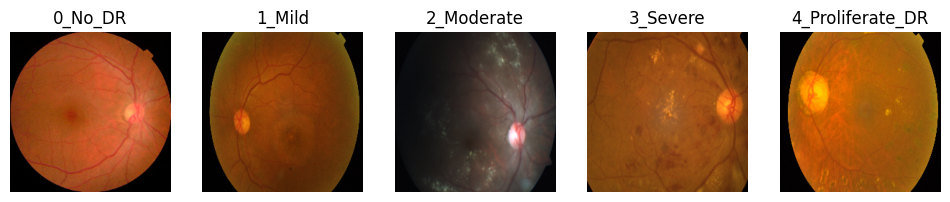

In [7]:
import matplotlib.pyplot as plt
import os
import cv2
import random

# Set path to image folder
image_folder = os.path.join(path, "colored_images")

# Define class names
class_labels = ['0_No_DR', '1_Mild', '2_Moderate', '3_Severe', '4_Proliferate_DR']

# Set up the figure
plt.figure(figsize=(12, 6))

# Display one sample image from each class
for i, class_name in enumerate(class_labels):
    class_path = os.path.join(image_folder, class_name)
    image_name = random.choice(os.listdir(class_path))  # Select a random image
    image_path = os.path.join(class_path, image_name)
    
    # Read and display the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
    
    plt.subplot(1, 5, i + 1)
    plt.imshow(image)
    plt.title(class_name)
    plt.axis('off')

plt.show()


In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Define image size and batch size
IMG_SIZE = (224, 224)  # Resize all images to 224x224
BATCH_SIZE = 32        # Process images in batches

# Define dataset path
image_folder = os.path.join(path, "colored_images")  # Your dataset path

# Use ImageDataGenerator for data preprocessing
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # Normalize pixels

# Load training images
train_generator = datagen.flow_from_directory(
    image_folder,  
    target_size=IMG_SIZE,  
    batch_size=BATCH_SIZE,
    class_mode="categorical",  
    subset="training"
)

# Load validation images
val_generator = datagen.flow_from_directory(
    image_folder,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation"
)


Found 2931 images belonging to 5 classes.
Found 731 images belonging to 5 classes.


In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define class labels
class_labels = ["0_No_DR", "1_Mild", "2_Moderate", "3_Severe", "4_Proliferate_DR"]


In [ ]:
# Define CNN model
model = Sequential([            #stack
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),      #2D to 1D
    Dense(128, activation='relu'),
    Dropout(0.5),  # Prevent overfitting
    Dense(5, activation='softmax')  # 5 classes (0_No_DR to 4_Proliferate_DR)
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


c:\Users\Sameer Ahmad\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,605 (42.61 MB)

 Trainable params: 11,169,605 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

visualization of feature extraction

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_1 (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_2 (Conv2D)                 │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_3 (Conv2D)                 │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,248 (364.25 KB)

 Trainable params: 93,248 (364.25 KB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


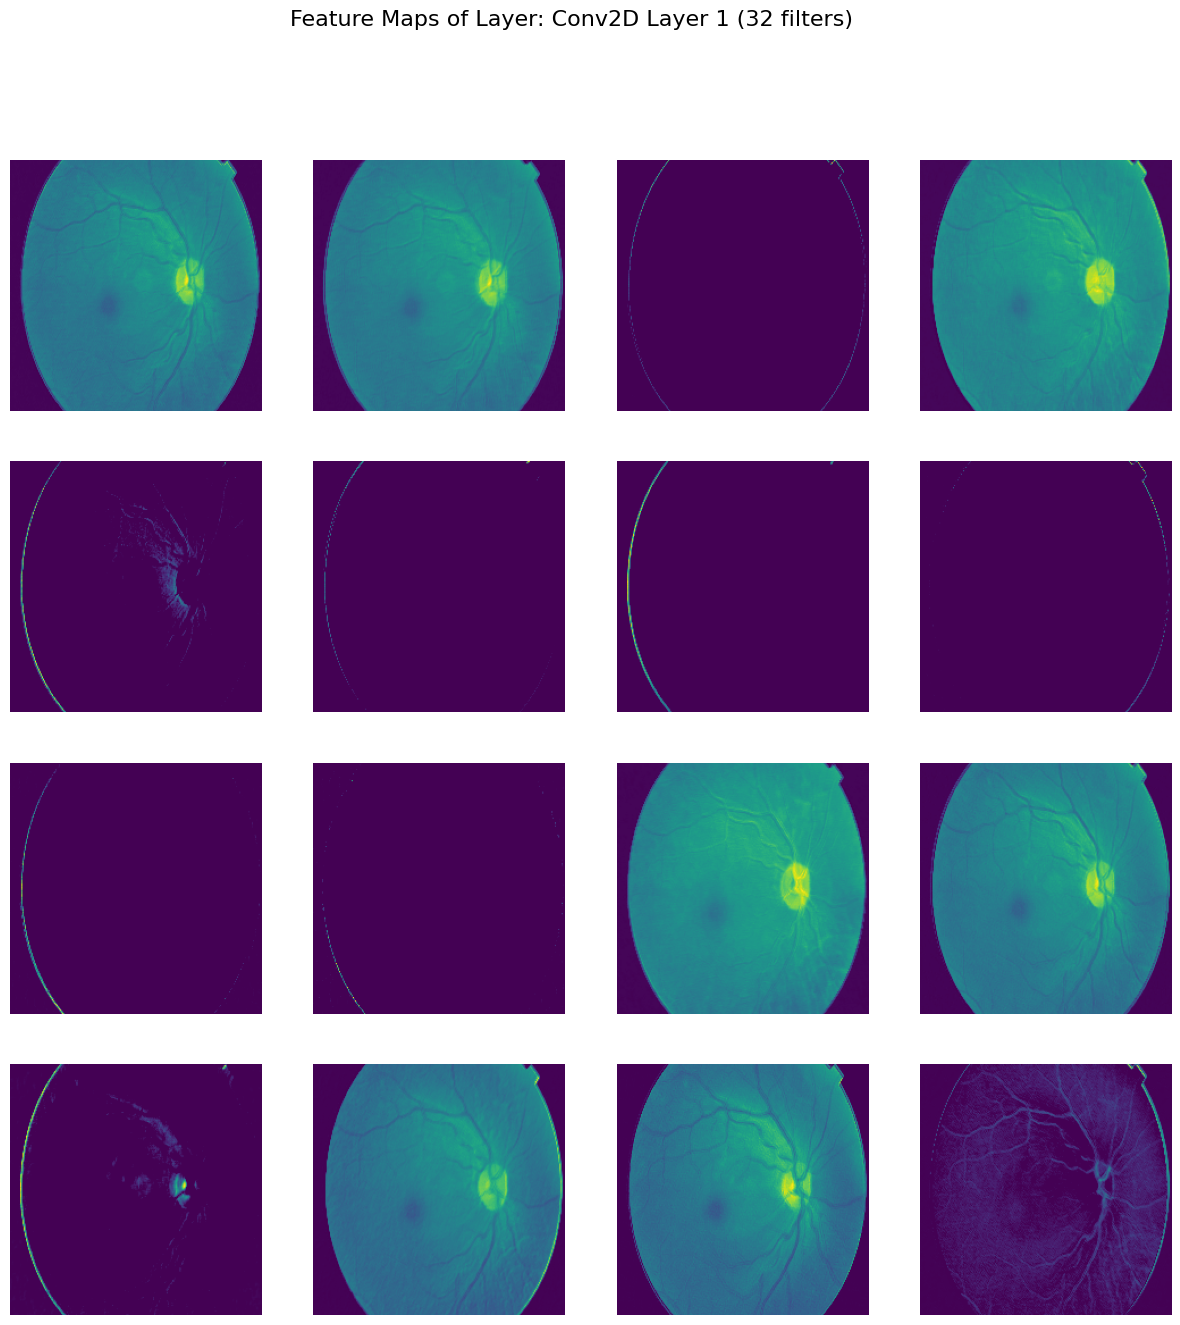

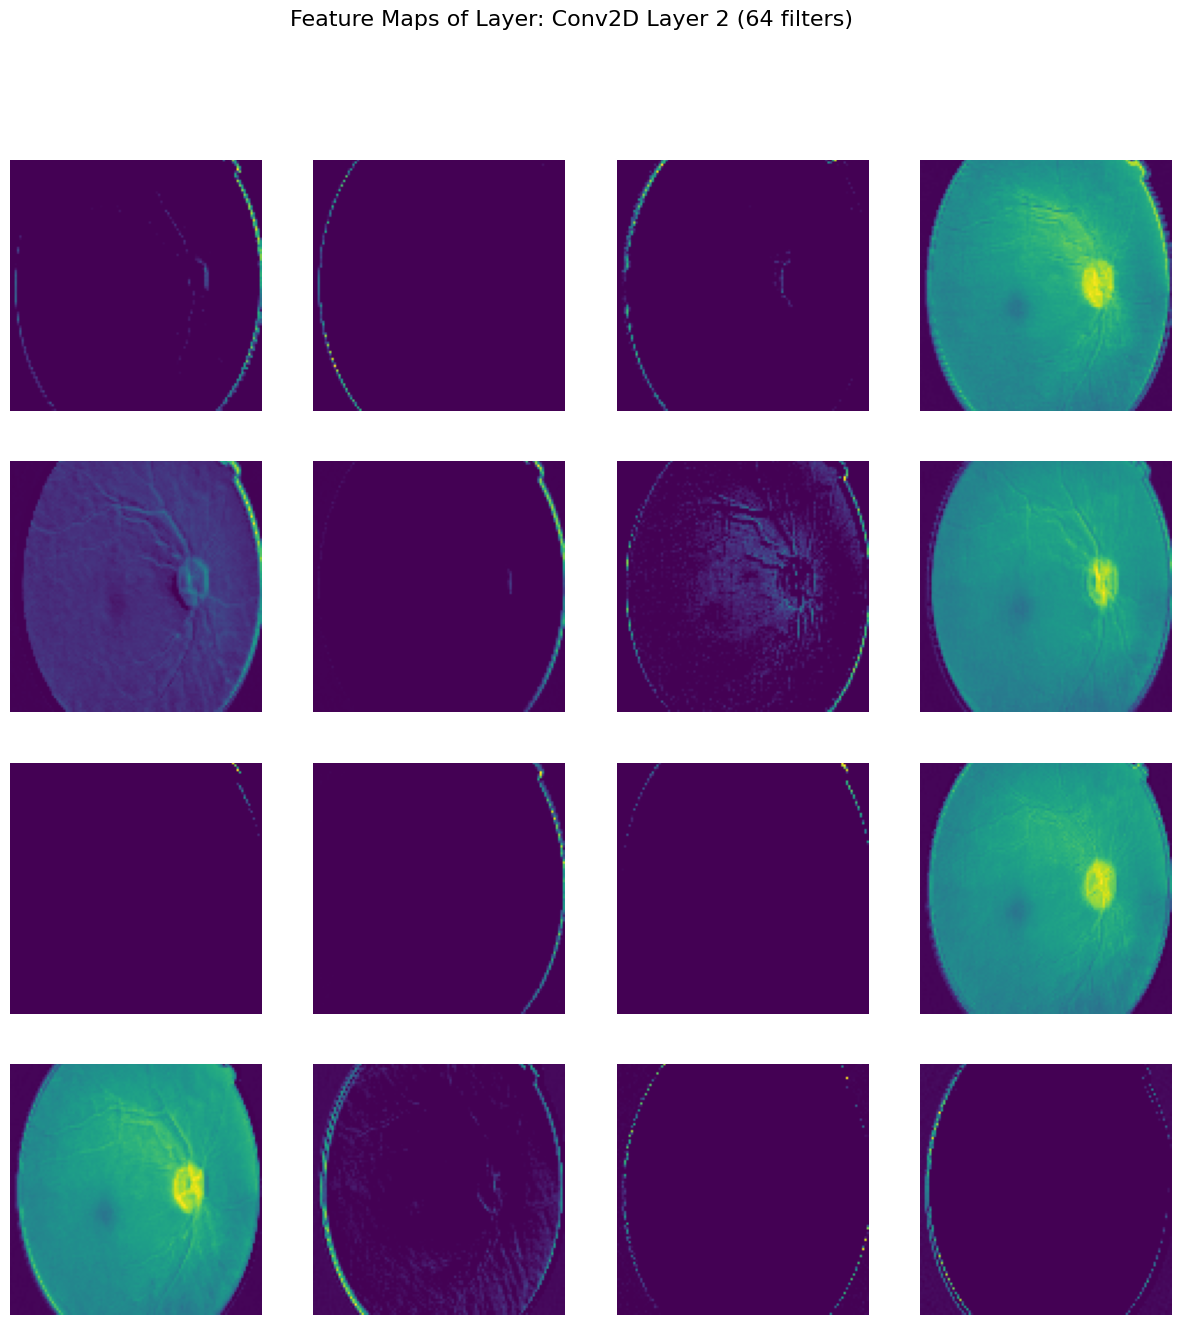

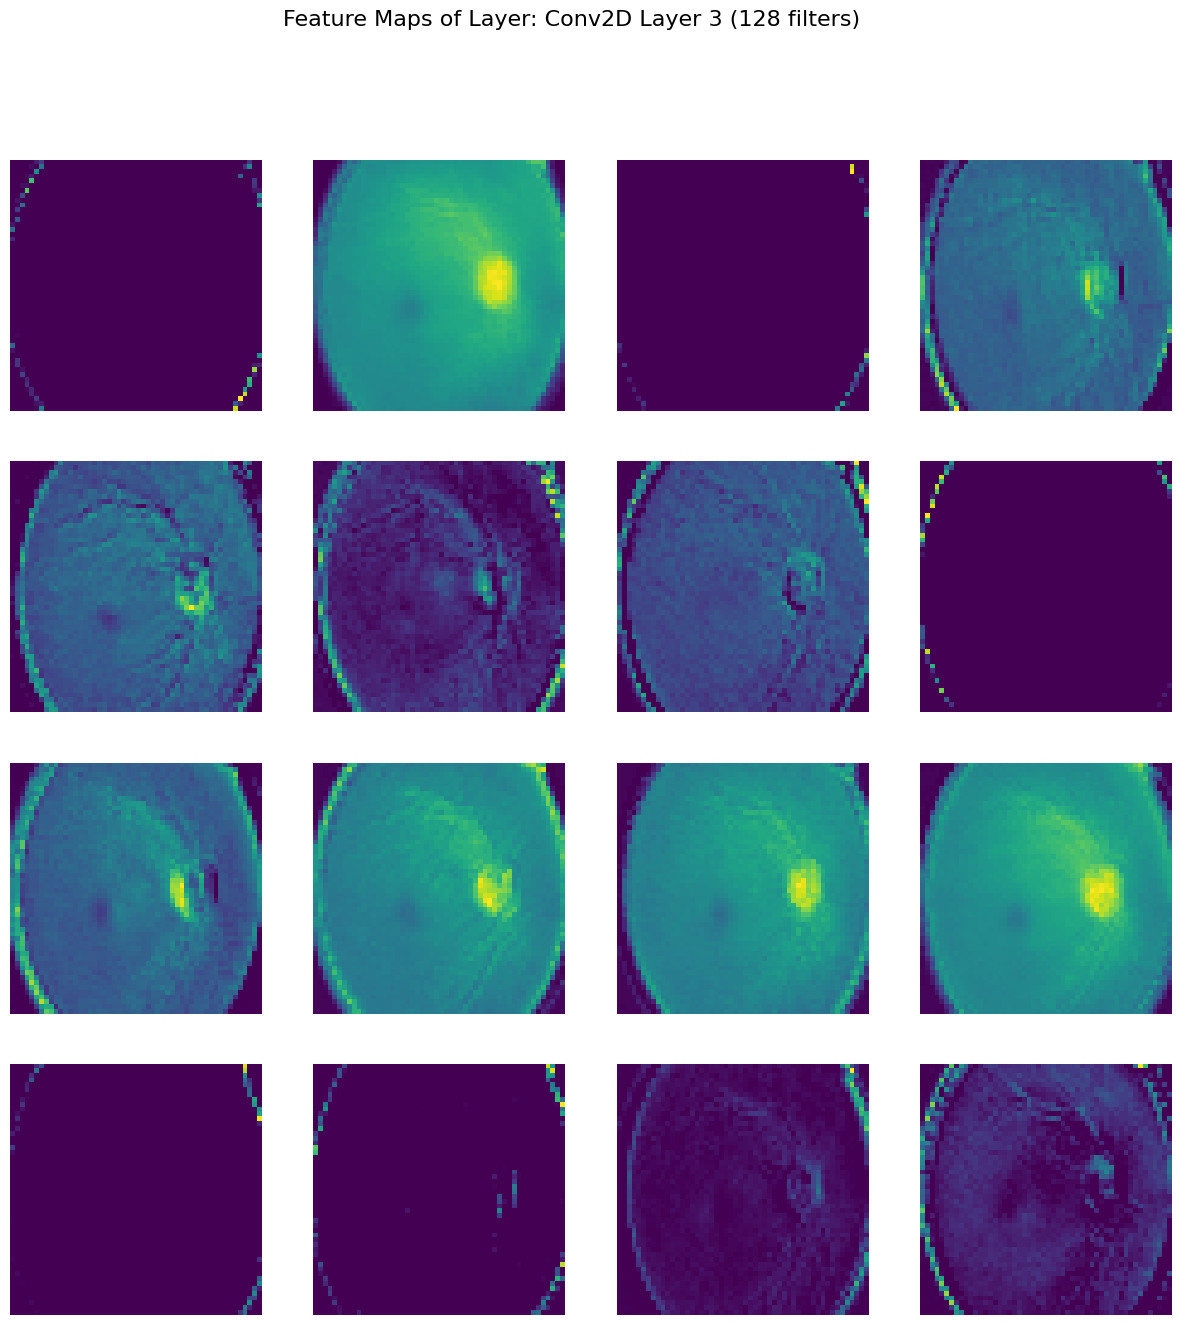

In [23]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D

# Define the model explicitly using Functional API
input_layer = Input(shape=(224, 224, 3))
x = Conv2D(32, (3,3), activation='relu', name="conv_1")(input_layer)
x = MaxPooling2D(2,2)(x)

x = Conv2D(64, (3,3), activation='relu', name="conv_2")(x)
x = MaxPooling2D(2,2)(x)

x = Conv2D(128, (3,3), activation='relu', name="conv_3")(x)
x = MaxPooling2D(2,2)(x)

model = Model(inputs=input_layer, outputs=x)  # Define the CNN model
model.summary()

# Load a sample image (Replace 'sample_image.jpg' with your image path)
img_path = r"C:\Users\Sameer Ahmad\Desktop\Major_Project\4fa26d065ad3.png" # Change to the correct path
img = image.load_img(img_path, target_size=(224, 224))  # Resize image to 224x224
img_array = image.img_to_array(img) / 255.0  # Normalize (convert pixel values between 0 and 1)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension (1, 224, 224, 3)

# Create a model to extract outputs from each Conv layer
layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name]  # Extract only Conv layers
feature_extractor = Model(inputs=model.input, outputs=layer_outputs)

# Get feature maps
feature_maps = feature_extractor.predict(img_array)

# Function to plot feature maps
def plot_feature_maps(feature_maps, layer_index, layer_name):
    """Function to plot feature maps of a given layer."""
    feature_map = feature_maps[layer_index]  # Get feature maps for the layer
    num_filters = feature_map.shape[-1]  # Number of filters
    
    plt.figure(figsize=(15, 15))
    for i in range(min(16, num_filters)):  # Show first 16 filters
        plt.subplot(4, 4, i + 1)
        plt.imshow(feature_map[0, :, :, i], cmap='viridis')
        plt.axis('off')
    plt.suptitle(f"Feature Maps of Layer: {layer_name}", fontsize=16)
    plt.show()

# Plot first, second, and third convolutional layers
plot_feature_maps(feature_maps, 0, "Conv2D Layer 1 (32 filters)")
plot_feature_maps(feature_maps, 1, "Conv2D Layer 2 (64 filters)")
plot_feature_maps(feature_maps, 2, "Conv2D Layer 3 (128 filters)")


In [38]:
for class_name in os.listdir(image_folder):
    class_path = os.path.join(image_folder, class_name)
    if os.path.isdir(class_path):
        print(f"{class_name}: {len(os.listdir(class_path))} images")


0_No_DR: 1805 images
1_Mild: 370 images
2_Moderate: 999 images
3_Severe: 193 images
4_Proliferate_DR: 295 images


The ImageDataGenerator in Keras is used for data augmentation, which helps improve the model's performance by artificially increasing the size and diversity of the dataset. This is especially useful in deep learning when training on limited data.

In [39]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,  # Randomly rotate images
    width_shift_range=0.2,  # Randomly shift images horizontally
    height_shift_range=0.2,  # Randomly shift images vertically
    shear_range=0.2,  # Randomly shear the images
    zoom_range=0.2,  # Randomly zoom the images
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest',  # How to fill missing pixels after transformation
    validation_split=0.2  # Set validation split
)


training

In [40]:
from sklearn.utils import class_weight
import numpy as np

# Get the class labels
class_names = os.listdir(image_folder)
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)

# Create a dictionary mapping class indices to weights
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Train the model with class weights
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator,
    class_weight=class_weight_dict
)


Epoch 1/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4491 - loss: 1.8120

c:\Users\Sameer Ahmad\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


92/92 ━━━━━━━━━━━━━━━━━━━━ 147s 2s/step - accuracy: 0.4500 - loss: 1.8082 - val_accuracy: 0.5609 - val_loss: 1.0118
Epoch 2/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.5895 - loss: 1.3106 - val_accuracy: 0.5978 - val_loss: 1.0067
Epoch 3/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 122s 1s/step - accuracy: 0.6225 - loss: 1.2695 - val_accuracy: 0.6033 - val_loss: 0.9070
Epoch 4/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 92s 994ms/step - accuracy: 0.6127 - loss: 1.2628 - val_accuracy: 0.6047 - val_loss: 1.0228
Epoch 5/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 98s 1s/step - accuracy: 0.6427 - loss: 1.2447 - val_accuracy: 0.6867 - val_loss: 0.8451
Epoch 6/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 98s 1s/step - accuracy: 0.6526 - loss: 1.1966 - val_accuracy: 0.6088 - val_loss: 0.9708
Epoch 7/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 91s 987ms/step - accuracy: 0.6418 - loss: 1.1919 - val_accuracy: 0.6703 - val_loss: 0.8656
Epoch 8/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 92s 992ms/step - accuracy: 0.6665 - loss: 1.1643 - val_accuracy: 0.6170 - val_loss

In [42]:
model.save("trained_model.keras")  # Save the previous model before retraining
model.save("trained_model.h5")

Solution to Keep Training History
If you want to keep history, you must save it separately:

In [43]:
import pickle

# Save history
with open('history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

# Load history later
with open('history.pkl', 'rb') as f:
    loaded_history = pickle.load(f)


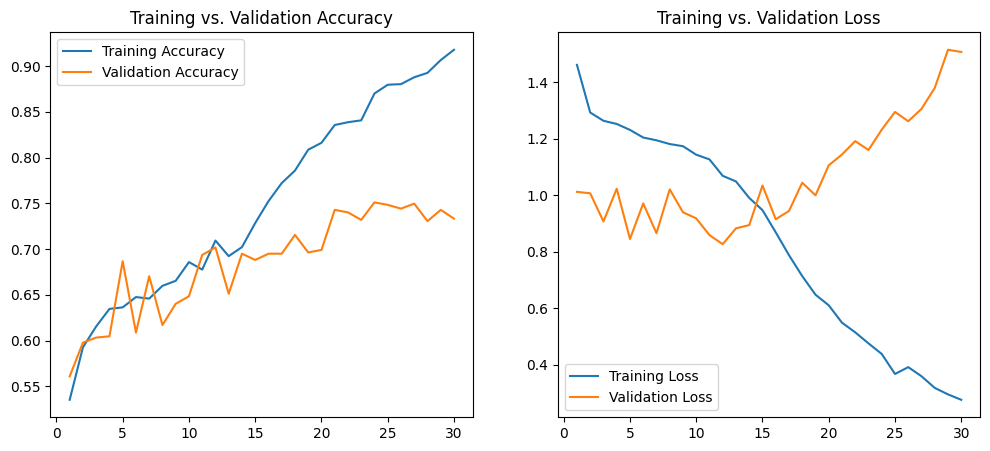

In [44]:
import matplotlib.pyplot as plt
import pickle

# Load the saved history
with open('history.pkl', 'rb') as f:
    loaded_history = pickle.load(f)

# Extract accuracy and loss from loaded history
acc = loaded_history['accuracy']
val_acc = loaded_history['val_accuracy']
loss = loaded_history['loss']
val_loss = loaded_history['val_loss']
epochs_range = range(1, len(acc) + 1)  # Adjust epochs range dynamically

# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Training vs. Validation Accuracy')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend()
plt.title('Training vs. Validation Loss')

plt.show()


Checking model accuracy

In [45]:
# Print the final accuracy and loss
print("Final Training Accuracy:", loaded_history['accuracy'][-1])
print("Final Validation Accuracy:", loaded_history['val_accuracy'][-1])


Final Training Accuracy: 0.9177755117416382
Final Validation Accuracy: 0.7332421541213989


In [47]:
# Evaluate the model
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")


23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 241ms/step - accuracy: 0.7361 - loss: 1.6047
Validation Loss: 1.506394386291504
Validation Accuracy: 0.7332421541213989


Classification Report
This provides detailed performance metrics, including precision, recall, and F1-score.

In [48]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Get true labels and predictions
true_labels = val_generator.classes
predictions = model.predict(val_generator)
predicted_labels = np.argmax(predictions, axis=1)

# Get class names
class_names = list(val_generator.class_indices.keys())

# Print Classification Report
print("Classification Report:\n", classification_report(true_labels, predicted_labels, target_names=class_names))


23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 252ms/step
Classification Report:
                   precision    recall  f1-score   support

         0_No_DR       0.48      0.49      0.48       361
          1_Mild       0.09      0.11      0.10        74
      2_Moderate       0.24      0.20      0.22       199
        3_Severe       0.06      0.08      0.07        38
4_Proliferate_DR       0.06      0.07      0.06        59

        accuracy                           0.31       731
       macro avg       0.19      0.19      0.19       731
    weighted avg       0.32      0.31      0.32       731



Confusion Matrix
A confusion matrix helps visualize the classification performance.

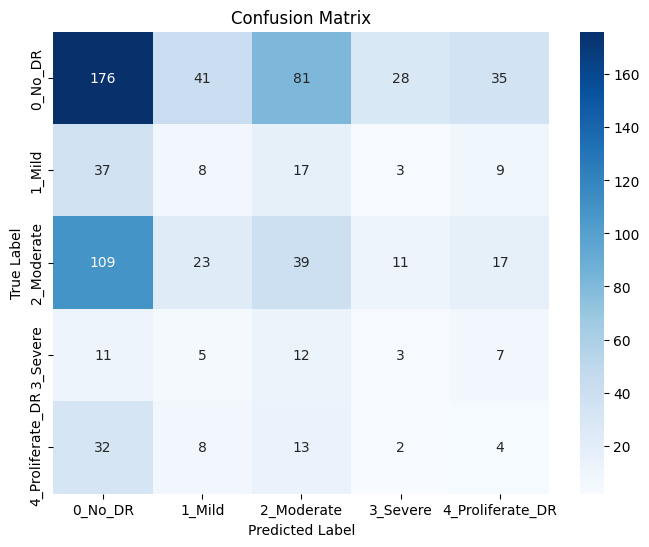

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [83]:
import cv2
import numpy as np

# Path to test image
image_path = r"C:\Users\Sameer Ahmad\.cache\kagglehub\datasets\sovitrath\diabetic-retinopathy-224x224-2019-data\versions\4\colored_images\4_Proliferate_DR\64fedbf97473.png"

# Load and preprocess the image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
image = cv2.resize(image, (224, 224))  # Resize to match input size
image = image / 255.0  # Normalize pixel values
image = np.expand_dims(image, axis=0)  # Add batch dimension

# Make prediction
prediction = model.predict(image)
predicted_class = np.argmax(prediction)

# Print the result
print(f"Predicted Class: {class_names[predicted_class]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Predicted Class: 4_Proliferate_DR


VVI Final_1 DARD (location name)

Instead of testing on a few images manually, test on a larger validation/test dataset to check overall performance. we have splited the data already.
Code to evaluate the model on a larger validation/test dataset and check its overall performance:

23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 254ms/step - accuracy: 0.7330 - loss: 1.4471
Validation Loss: 1.5063942670822144
Validation Accuracy: 0.7332421541213989
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 212ms/step
Classification Report:
                   precision    recall  f1-score   support

         0_No_DR       0.49      0.49      0.49       361
          1_Mild       0.12      0.14      0.13        74
      2_Moderate       0.27      0.22      0.24       199
        3_Severe       0.02      0.03      0.02        38
4_Proliferate_DR       0.06      0.07      0.06        59

        accuracy                           0.32       731
       macro avg       0.19      0.19      0.19       731
    weighted avg       0.33      0.32      0.33       731



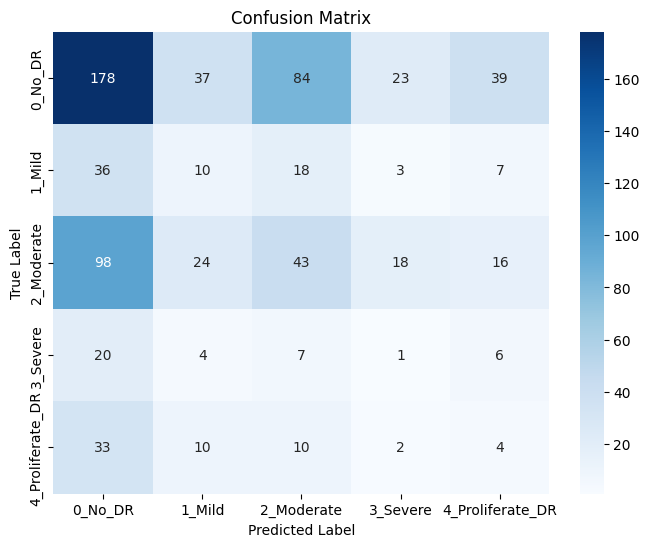

In [84]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Evaluate the model on the test dataset
val_loss, val_accuracy = model.evaluate(val_generator)

print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

# Get true labels and predictions
true_labels = val_generator.classes
predictions = model.predict(val_generator)
predicted_labels = np.argmax(predictions, axis=1)

# Get class names
class_names = list(val_generator.class_indices.keys())

# Print Classification Report
print("Classification Report:\n", classification_report(true_labels, predicted_labels, target_names=class_names))

# Compute and plot confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
